<h1 style="font-weight: bold; text-align: center;">Preprocessing - Pipeline</h1>

---

<h1>1 - Notebook Setup</h1>

<h2>1.1 - Imports</h2>

In [31]:
# NLP
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from autocorrect import Speller
from string import punctuation

import nltk

# visualization
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# data manipulation
from pathlib import Path

import pandas as pd
import os

# Download NLP dependencies
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /home/brain-
[nltk_data]     matheus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/brain-
[nltk_data]     matheus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/brain-
[nltk_data]     matheus/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

<h2>1.2 - Dataset path</h2>

In [9]:
try:
    from google.colab import drive 
    drive.mount('/content/gdrive')
    df_path = Path('/content/gdrive/MyDrive/')
    figure_path = Path('/content')
    ENV = 'Google Colab'
except Exception as error:
    df_path = Path(os.getcwd().replace('notebooks', 'data/raw'))
    figure_path = Path(os.getcwd().replace('notebooks', 'figures'))
    ENV = 'Local Machine'

print(f'[\033[1;33mENVIRONMENT\033[0m]: {ENV}')
print(f'Dataset located in {df_path}')

[ENVIRONMENT]: Local Machine
Dataset located in /home/brain-matheus/Matheus/ChatBot/data/raw


<h1>2 - Dataset</h1>

<h2>2.1 - Loading dataset</h2>

In [10]:
data_frame = pd.read_csv(df_path.joinpath('chatbot_dataset.csv'), encoding='utf-8', delimiter=",", on_bad_lines='skip')

<h3>2.1.1 - Converting all rows in strings</h3>

In [11]:
data_frame['question'] = data_frame['question'].apply(lambda row: str(row))
data_frame['answer'] = data_frame['answer'].apply(lambda row: str(row))

In [12]:
data_frame

,Unnamed: 0,question,answer
0,0,Who did the first work generally recognized as...,Warren McCulloch and Walter Pitts (1943).
1,1,What sources was drawn on the formation of the...,knowledge of the basic physiology and function...
2,2,Who created the Hebbian learning rule?,Donald Hebb (1949).
3,3,When the first neural network is built?,1950.
4,4,What is the first neural network called?,The SNARC.
...,...,...,...
4348,4348,How do you treat a snake bite?,While waiting for medical help: 1)Move the per...
4349,4349,How do you treat a animal bite?,1)Wash the wound with soap and warm water. 2)G...
4350,4350,What to do if someone is Drowning?,1)Place your ear next to the person's mouth an...
4351,4351,How to give CPR??,"1)For an adult or child, place the heel of one..."


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4353 non-null   int64 
 1   question    4353 non-null   object
 2   answer      4353 non-null   object
dtypes: int64(1), object(2)
memory usage: 102.1+ KB


<h2>2.2 - Cleaning text</h2>

In [14]:
unwantedChars = [
    '\'', 
    '\"',
    '/p',
    'ª',
    'º',
    '.',
    '!',
    '?',
    ',',
    ';',
    ':',
    '-',
    '\'',
    '!!',
    '``',
    '"'
    ]
unwantedWords = [
    '\'s',
    "n't",
    '\'m',
    '\'ll',
    '\'re'
]

stopwords = set(stopwords.words('english') + list(punctuation) + list(unwantedChars) + list (unwantedWords))

<h3>2.2.1 - Removing Stop Words</h3>

In [15]:
def removeStopWords(text):
  filteredWords = [word for word in word_tokenize(text.lower()) if word not in stopwords]
  return [word for word in filteredWords if len(word) > 1]

def plotWordCloud(data_tokenized):
  allWordsInRows = data_tokenized[:][:]
  allWords = []

  for wordsRow in allWordsInRows:
    allWords.extend(wordsRow)

  frequencies = nltk.FreqDist(allWords)
  sorted(frequencies,key=frequencies.__getitem__, reverse=True)

  wordcloud = WordCloud().generate_from_frequencies(frequencies)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

  return allWordsInRows, frequencies, allWords

def plotFrenquencies(fr):
  fr.plot(20,cumulative=False)

<h3>2.2.2 - Word Cloud of 'Question' column with Stop Words</h3>

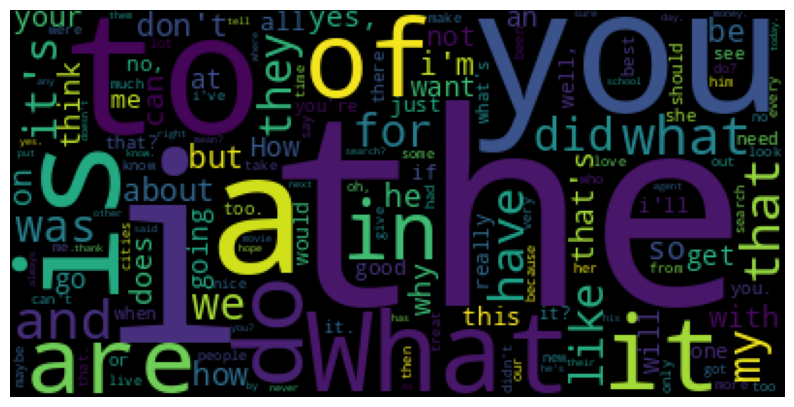

In [16]:
allWords, allWordsInRows, frequencies = plotWordCloud(data_frame['question'].apply(lambda row: [word for word in row.split(' ')]))

<h3>2.2.3 - Word Cloud of 'Answer' column with Stop Words</h3>

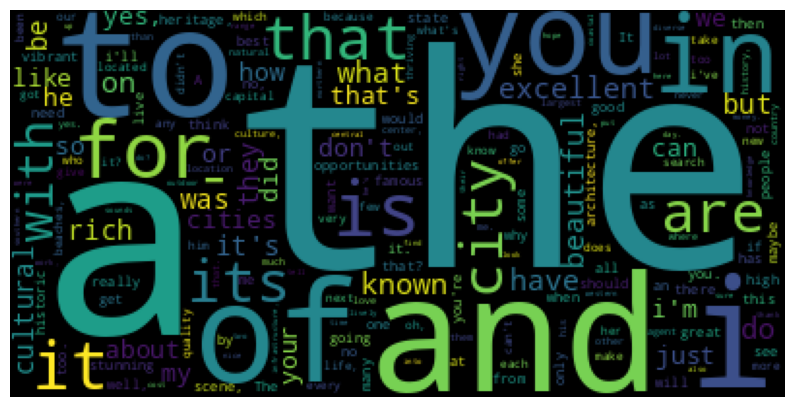

In [17]:
allWords, allWordsInRows, frequencies = plotWordCloud(data_frame['answer'].apply(lambda row: [word for word in row.split(' ')]))

<h3>2.2.4 - Removing Stop Words</h3>

In [18]:
question_tokenized = data_frame['question'].apply(removeStopWords)
answer_tokenized = data_frame['answer'].apply(removeStopWords)

<h3>2.2.5 - Word Cloud of 'Question' column without Stop Words</h3>

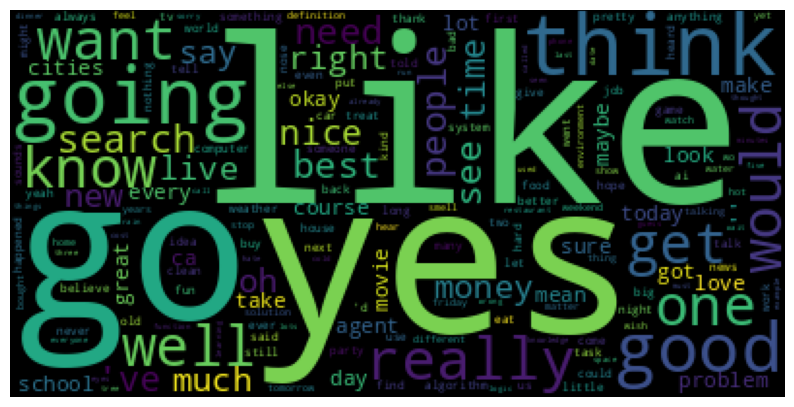

In [19]:
allWords, allWordsInRows, frequencies = plotWordCloud(question_tokenized)

<h3>2.2.6 - Word Cloud of 'Answer' column without Stop Words</h3>

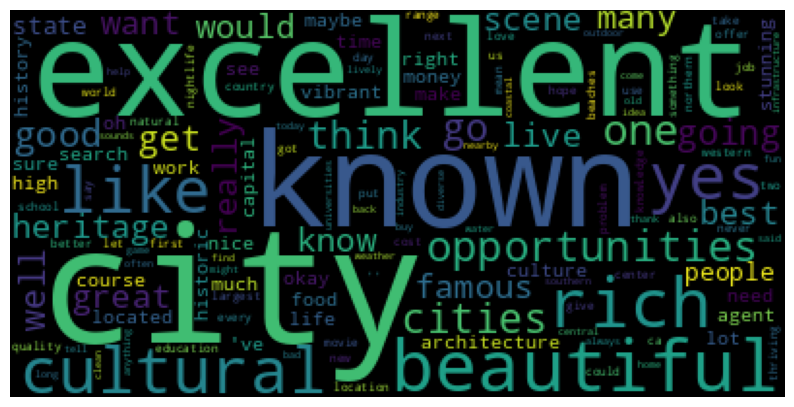

In [20]:
allWords, allWordsInRows, frequencies = plotWordCloud(answer_tokenized)

<h3>2.2.7 - Creating new dataset</h3>

In [21]:
data_frame_cleaned_1 = pd.concat(
    objs=[
        question_tokenized.apply(lambda row: ' '.join(row)),
        answer_tokenized.apply(lambda row: ' '.join(row))
    ],
    axis=1
)

In [22]:
data_frame_cleaned_1

,question,answer
0,first work generally recognized ai,warren mcculloch walter pitts 1943
1,sources drawn formation first work generally r...,knowledge basic physiology function neurons br...
2,created hebbian learning rule,donald hebb 1949
3,first neural network built,1950
4,first neural network called,snarc
...,...,...
4348,treat snake bite,waiting medical help move person beyond striki...
4349,treat animal bite,wash wound soap warm water gently press clean ...
4350,someone drowning,place ear next person mouth nose feel air chee...
4351,give cpr,adult child place heel one hand center chest n...


### 2.2.8 - Correcting Words

In [25]:
class WordCorrection:

    def __init__(self) -> None:
        
        # model
        self.model = Speller(lang='en')
    
    def __call__(self, sentence: str) -> str:

        # inference
        return self.model(sentence=sentence.strip())

In [26]:
word_corrector = WordCorrection()

In [27]:
data_frame_cleaned_1['question_word_corrected'] = data_frame_cleaned_1['question'].apply(func=word_corrector)
data_frame_cleaned_1['answer_word_corrected'] = data_frame_cleaned_1['answer'].apply(func=word_corrector)

In [30]:
data_frame_cleaned_1.head(20)

,question,answer,question_word_corrected,answer_word_corrected
0,first work generally recognized ai,warren mcculloch walter pitts 1943,first work generally recognized ai,warren mcculloch walter pits 1943
1,sources drawn formation first work generally r...,knowledge basic physiology function neurons br...,sources drawn formation first work generally r...,knowledge basic physiology function neurons br...
2,created hebbian learning rule,donald hebb 1949,created lesbian learning rule,donald herb 1949
3,first neural network built,1950,first neural network built,1950
4,first neural network called,snarc,first neural network called,snare
5,introduced turing test,machine learning,introduced during test,machine learning
6,alan turing prefer method creating human-level al,prefer develop learning algorithms teach machi...,alan during prefer method creating human-level al,prefer develop learning algorithms teach machi...
7,presented logic theorist lt,allen newell herbert simon carnegie tech,presented logic theorist lt,allen well herbert simon carnegie tech
8,general problem solver gps designed,gps designed start imitate human problem-solvi...,general problem solver gps designed,gps designed start imitate human problem-solvi...
9,model robably first program embody thinking hu...,general problem solver gps,model probably first program embody thinking h...,general problem solver gps


#### 2.2.8.1 - Looking for Different Sentences

In [36]:
data_frame_cleaned_1['question_fixed'] = data_frame_cleaned_1.apply(lambda col: True if col.question.strip() != col.question_word_corrected.strip() else False, axis=1)
data_frame_cleaned_1['answer_fixed'] = data_frame_cleaned_1.apply(lambda col: True if col.answer.strip() != col.answer_word_corrected.strip() else False, axis=1)

In [41]:
question_sentences_df = data_frame_cleaned_1[data_frame_cleaned_1['question_fixed'] == True][['question', 'question_word_corrected']]
print(question_sentences_df.shape)
question_sentences_df.head(10)

(234, 2)


,question,question_word_corrected
2,created hebbian learning rule,created lesbian learning rule
5,introduced turing test,introduced during test
6,alan turing prefer method creating human-level al,alan during prefer method creating human-level al
9,model robably first program embody thinking hu...,model probably first program embody thinking h...
12,constructed geometry theorem prover,constructed geometry theorem proper
14,defined high-level language lisp,defined high-level language list
19,perceptron convergence theorem say,perception convergence theorem say
20,book preceptrons 1969 mentioned,book receptions 1969 mentioned
23,dendral program powerful,general program powerful
26,content heuristic programming project hpp,content heuristic programming project pp


In [42]:
answer_sentences_df = data_frame_cleaned_1[data_frame_cleaned_1['answer_fixed'] == True][['answer', 'answer_word_corrected']]
print(answer_sentences_df.shape)
answer_sentences_df.head(10)

(304, 2)


,answer,answer_word_corrected
0,warren mcculloch walter pitts 1943,warren mcculloch walter pits 1943
1,knowledge basic physiology function neurons br...,knowledge basic physiology function neurons br...
2,donald hebb 1949,donald herb 1949
4,snarc,snare
7,allen newell herbert simon carnegie tech,allen well herbert simon carnegie tech
10,allen newell herbert simon,allen well herbert simon
17,james slagle saint program,james single saint program
19,theorem says learning algorithm adjust connect...,theorem says learning algorithm adjust connect...
20,although perceptrons simple form neural networ...,although perceptions simple form neural networ...
24,dendral program,general program


#### 2.2.8.2 - Plotting Percentage of Fixed Sentences

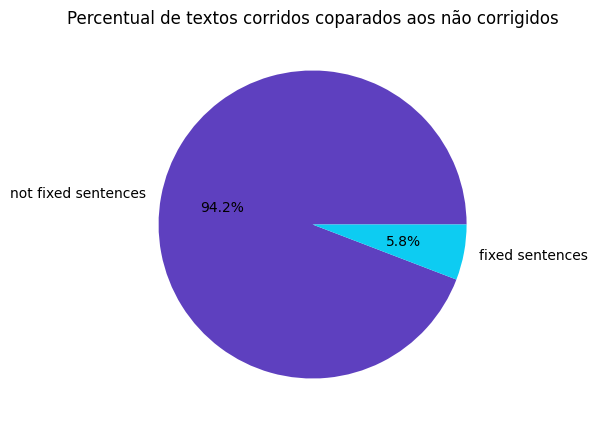

In [50]:
fixed_sentences = answer_sentences_df.shape[0] + question_sentences_df.shape[0]
not_fixed_sentences = data_frame_cleaned_1['answer_fixed'].shape[0] + data_frame_cleaned_1['question_fixed'].shape[0]

fig, ax = plt.subplots(figsize=(5,5))

ax.pie(
    x=[not_fixed_sentences, fixed_sentences], 
    labels=['not fixed sentences', 'fixed sentences'], 
    colors=['#5e40bf', '#0dccf2'],
    autopct='%2.1f%%'
)
ax.set_title(label='Percentual de textos corridos coparados aos não corrigidos')

plt.show()